In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

# Hide Warnings
pd.options.mode.chained_assignment = None

# Intelligent Data Analysis Project: Income

Load the data into Python and preprocess it. Choose adequate data transformations, normalizations etc. and decide on how to deal with missing values (marked with “?”). Consider which kinds of features the preprocessed data shall contain. Once you have preprocessed the data, train a model to predict a person’s income group and apply it to the 25.000 individuals whose income group is unknown. Identify a suitable learning method and implement it in Python. Train and evaluate the model. Provide a short documentation and motivation of each of your steps.

In [137]:
# Import data set and add column names
income = pd.read_csv('data/einkommen.train', sep=",", na_values = " ?", header=None)

# Set Column Names
columns = ["Age", "Employment Type", "Weighting Factor", "Education Level", "Schooling/Training Period", "Marital Status", "Employment Area", "Partnership", "Ethnicity", "Gender", "Gains", "Losses", "Weekly Working Time", "Country Of Birth", "Income"]
income.columns = columns

# Remove leading/trailing whitespaces from columns that contain strings
string_columms = income.select_dtypes(object).columns
income[string_columms] = income[string_columms].apply(lambda x: x.str.strip())

In [138]:
# Split data set into sets where Income is known or unknwn
income_labeled = income[income['Income'].notnull()]
income_unlabeled = income[income['Income'].isnull()]

## Problem Setting

Target: Estimate/Predict individual's income from his/her personal data for the 25.000 people were the income is unknown.

Data:
* Answers regarding to features of 30.000 individuals
* Data set contains missing values
* Income (Target) known for 5.000 of the 30.000 individuals


*

Type of Learning Problem: Supervised Learning

Model Space:

* Classification Problem

Testing the approaches of Support Vector Machine (SVM) for linear classification and decision trees. Decision trees to visualize the most important features for predicting the income.

* Decision Trees were chosen over Random Forest for better visualizing the decision criterion even though using a random forest would lead to a better accuracy in the results.




Loss-Function / Regulariser: 

--

Extra: prepare the data such that they can be used for further regression and correlation analyses.

## Analysis

### General Overview

In [4]:
print("Number of Rows:", income_labeled.shape[0])
print("Number of Columns (incl. Target):", income_labeled.shape[1])

Number of Rows: 5000
Number of Columns (incl. Target): 15


In [5]:
# Look at input values
income_labeled.head()
# income_labeled['Weighting Factor'].unique()

,Age,Employment Type,Weighting Factor,Education Level,Schooling/Training Period,Marital Status,Employment Area,Partnership,Ethnicity,Gender,Gains,Losses,Weekly Working Time,Country Of Birth,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
income_labeled.describe()

,Age,Weighting Factor,Schooling/Training Period,Gains,Losses,Weekly Working Time
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000
mean,38.600200,1.907684e+05,10.079600,1033.640200,93.696800,40.519000
std,13.594695,1.063596e+05,2.534906,7051.802077,410.801418,12.109193
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176958e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.794750e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.416575e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,2547.000000,99.000000


### Analysis of Numeric Variables

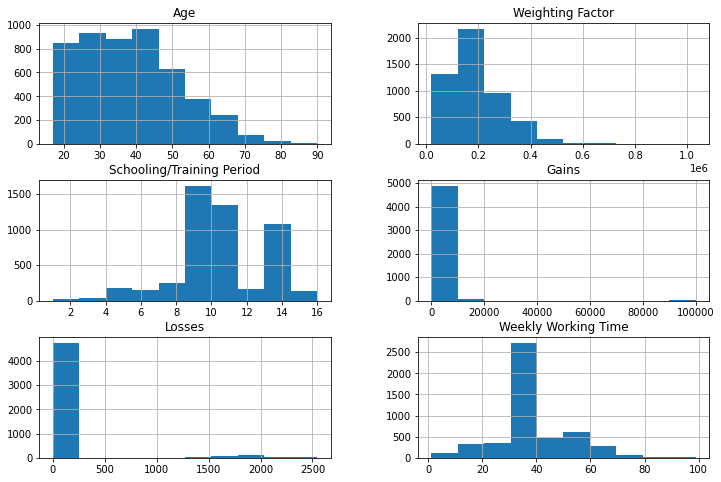

In [7]:
# Check how numeric values are distributed
numeric_distribution = income_labeled.hist(figsize=(12,8))

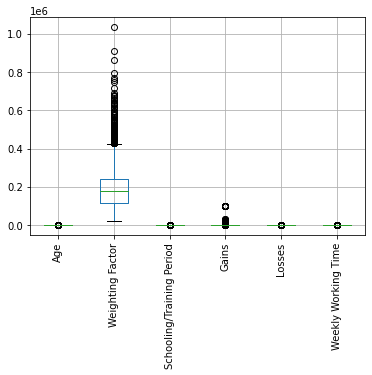

In [8]:
numeric_distribution_boxplot = income_labeled.boxplot()
numeric_distribution_boxplot = numeric_distribution_boxplot.set_xticklabels(numeric_distribution_boxplot.get_xticklabels(),rotation=90)

The boxplots above shows that the numeric variables follow different scales. This indicates that some kind of normalization is needed.

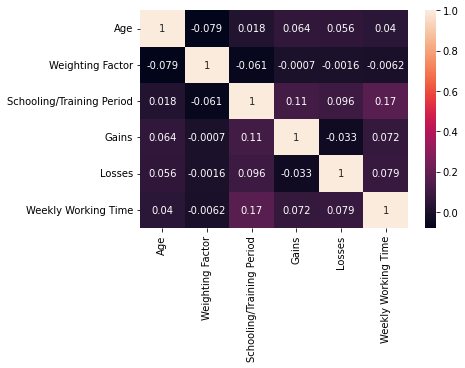

In [9]:
# Correlations between numeric features
correlation_matrix = sns.heatmap(income_labeled.corr(), annot=True)

### Analysis of Categorical Variables

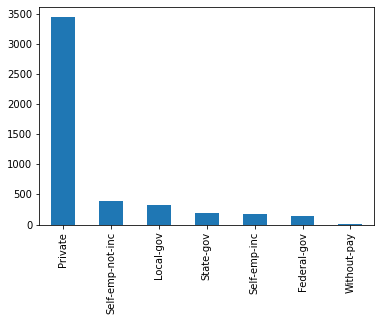

In [10]:
employment_type_distribution = income_labeled['Employment Type'].value_counts().plot(kind='bar')

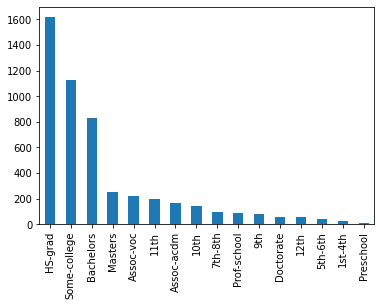

In [11]:
education_distribution = income_labeled['Education Level'].value_counts().plot(kind='bar')

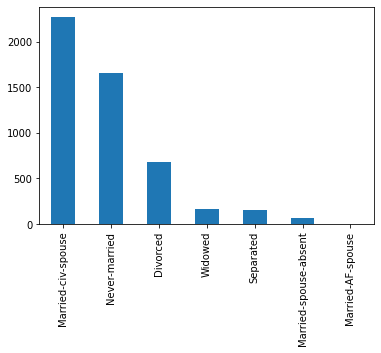

In [12]:
maritial_status_distribution = income_labeled['Marital Status'].value_counts().plot(kind='bar')

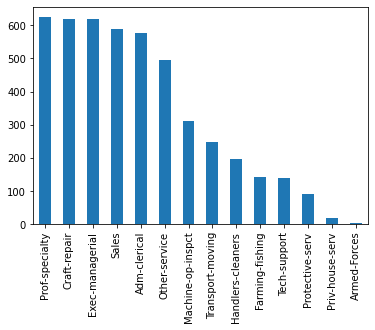

In [13]:
employment_area_distribution = income_labeled['Employment Area'].value_counts().plot(kind='bar')

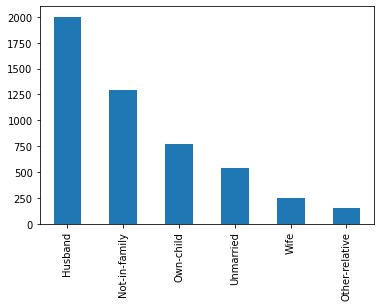

In [14]:
partnership_distributon = income_labeled['Partnership'].value_counts().plot(kind='bar')

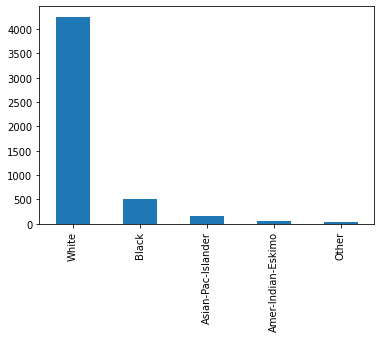

In [15]:
ethnicity_distribution = income_labeled['Ethnicity'].value_counts().plot(kind='bar')

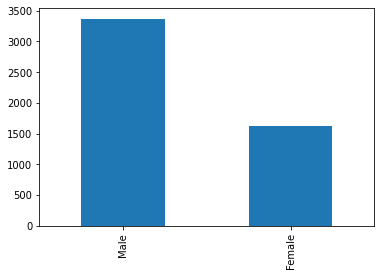

In [16]:
gender_distribution = income_labeled['Gender'].value_counts().plot(kind='bar')

Country Of Birth
United-States    4465
Mexico            104
Canada             28
Philippines        22
Germany            22
Name: Country Of Birth, dtype: int64

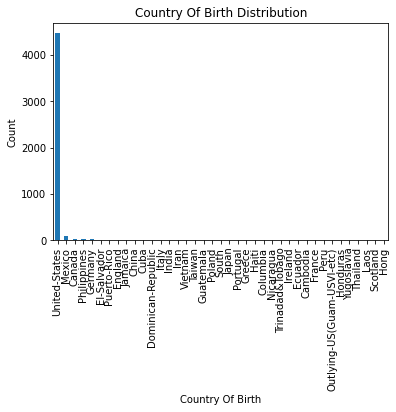

In [17]:
country_distribution = income_labeled['Country Of Birth'].value_counts().plot(kind='bar')
country_distribution.set(xlabel="Country Of Birth", ylabel="Count", title="Country Of Birth Distribution")

# Top 5 Origin Countries
income_labeled.groupby(['Country Of Birth'])['Country Of Birth'].count().sort_values(ascending=False).head(5)

Nearly all of the interviewed people are from the US (majority class) and all other countries are minority classes. This indicates a low relevance of this feature and bad predictions for people from the minority class countries if we would assume that this feature is a relevant feature for predicting the income.

Income
<=50K    3779
>50K     1221
Name: Income, dtype: int64

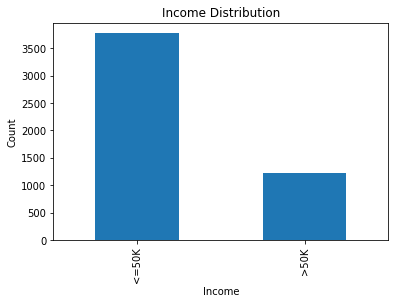

In [18]:
# Check balance of target variable
target_distribution = income_labeled['Income'].value_counts().plot(kind='bar')
target_distribution.set(xlabel="Income", ylabel="Count", title="Income Distribution")

income_labeled.groupby(['Income'])['Income'].count()

The target variable is imbalanced because "<= 50K" occurs three times as often as ">50k". Though, the imbalance is only mild as the proportion of the minority class is between 20-40% [1].

### Analysis of Missing Values

In [19]:
print("Number of Rows with NA Values:", income_labeled.isnull().any(axis=1).sum())
print("Fraction of Rows with NA Values", round(income_labeled.isnull().any(axis=1).sum()/income_labeled.shape[0]*100, 2), "%")

income_labeled.isna().sum()

Number of Rows with NA Values: 420
Fraction of Rows with NA Values 8.4 %


Age                            0
Employment Type              331
Weighting Factor               0
Education Level                0
Schooling/Training Period      0
Marital Status                 0
Employment Area              331
Partnership                    0
Ethnicity                      0
Gender                         0
Gains                          0
Losses                         0
Weekly Working Time            0
Country Of Birth              97
Income                         0
dtype: int64

Missing values appear in three columns which are all categorical variables.

## Data Preparation

In [20]:
# Remove irrelevant/unused column
# Weighting factor - to compensate for an interview-dependent selection bias
income_labeled = income_labeled.drop('Weighting Factor', axis=1)

In [21]:
# Handling Missing Values
income_labeled = income_labeled.dropna()

In [22]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding for Education Level (ordinal)
education_level = ['Preschool','1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']
oe_edu = OrdinalEncoder(categories=[education_level])
income_labeled['Education Level'] = oe_edu.fit_transform(income_labeled[['Education Level']])

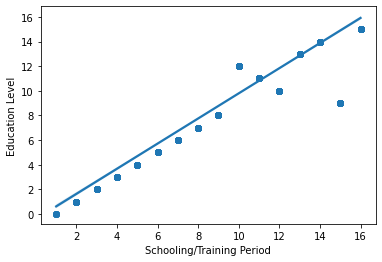

,Education Level,Schooling/Training Period,Income
Education Level,1.000000,0.870818,0.229661
Schooling/Training Period,0.870818,1.000000,0.315673
Income,0.229661,0.315673,1.000000


In [23]:
# Correlation between 'Schooling/Training Period' and 'Education Level'
regression_plot = sns.regplot(x='Schooling/Training Period', y='Education Level', data=income_labeled)
plt.show()

education_correlation = income_labeled.copy()
education_correlation['Income'].replace(['<=50K', '>50K'], [0, 1], inplace=True)

education_correlation[['Education Level', 'Schooling/Training Period', 'Income']].corr()

The feature 'Education Level' (e.g. High School, Bachelor, Master) shows a strong correlation with the feature 'Schooling/Training Period'. Only for higher education levels that allow more flexiblity the linearity between the two features ends. The feature 'Schooling/Training Period' shows a stronger correlation with the target variable 'Income' than the feature 'Education Level'.

In [24]:
# One-Hot Encoding for categorical variables (without order)
one_hot_columns = ['Employment Type', 'Marital Status', 'Employment Area', 'Partnership', 'Ethnicity', 'Gender', 'Country Of Birth']
income_labeled = pd.get_dummies(income_labeled, columns=one_hot_columns)

In [25]:
# Transform Target Variable to Numeric
income_labeled['Income'].replace(['<=50K', '>50K'], [0, 1], inplace=True)
labels = ['<=50K', '>50K']

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Feature Scaling: MinMaxScaling (intervall 0, 1)
income_labeled_scaled = income_labeled.copy()

col_names = ['Age', 'Schooling/Training Period', 'Weekly Working Time', 'Gains', 'Losses']
features = income_labeled_scaled[col_names]

scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
income_labeled_scaled[col_names] = features

In [27]:
from sklearn.model_selection import train_test_split

# Train / Test-Split
income_X_train, income_X_test, income_y_train, income_y_test = train_test_split(income_labeled_scaled.drop('Income', axis=1), income_labeled['Income'], test_size=0.25, random_state=42)

In [28]:
print("Data Set after Data Preparation/Preparation")
print("Number of Rows:", income_labeled.shape[0])
print("Number of Columns (incl. Target):", income_labeled.shape[1])

print("\nTrain Data Set")
print("Number of Rows:", income_X_train.shape[0])
print("Number of Columns (excl. Target):", income_X_train.shape[1])

print("\nTest Data Set")
print("Number of Rows:", income_X_test.shape[0])
print("Number of Columns (excl. Target):", income_X_test.shape[1])

Data Set after Data Preparation/Preparation
Number of Rows: 4580
Number of Columns (incl. Target): 87

Train Data Set
Number of Rows: 3435
Number of Columns (excl. Target): 86

Test Data Set
Number of Rows: 1145
Number of Columns (excl. Target): 86


## Methods (& Experiments)

### Linear Classification

In [172]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
parameters = {'kernel':
              ('linear', 'rbf'), 
              'gamma': [0.1, 1, 10, 100], 
              'C':[0.01, 0.1, 1, 10]}
svc = svm.SVC()
clf_svm = GridSearchCV(svc, parameters, scoring='roc_auc')
clf_svm.fit(income_X_train, income_y_train)
print(clf_svm)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ('linear', 'rbf')},
             scoring='roc_auc')


In [173]:
clf_svm_best = clf_svm.best_estimator_
clf_svm_best

SVC(C=10, gamma=0.1, kernel='linear')

In [175]:
income_y_pred_svm = clf_svm_best.predict(income_X_test)
income_y_pred1 = clf_svm.predict(income_X_test)
print(accuracy_score(income_y_pred_svm, income_y_test))
accuracy_score(income_y_pred1, income_y_test)

0.8331877729257642


0.8331877729257642

### Decision Tree

In [176]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree

# Hyperparameter Tuning
parameters = {'max_depth': [1, 5, 10, 15, 80]}
dtc = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_dt = GridSearchCV(dtc, parameters, scoring='roc_auc')
clf_dt.fit(income_X_train, income_y_train)
print(clf_dt)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [1, 5, 10, 15, 80]}, scoring='roc_auc')


In [177]:
clf_dt_best = clf_dt.best_estimator_
clf_dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [178]:
income_y_pred_dt = clf_dt_best.predict(income_X_test)
accuracy_score(income_y_pred_dt, income_y_test)

0.8471615720524017

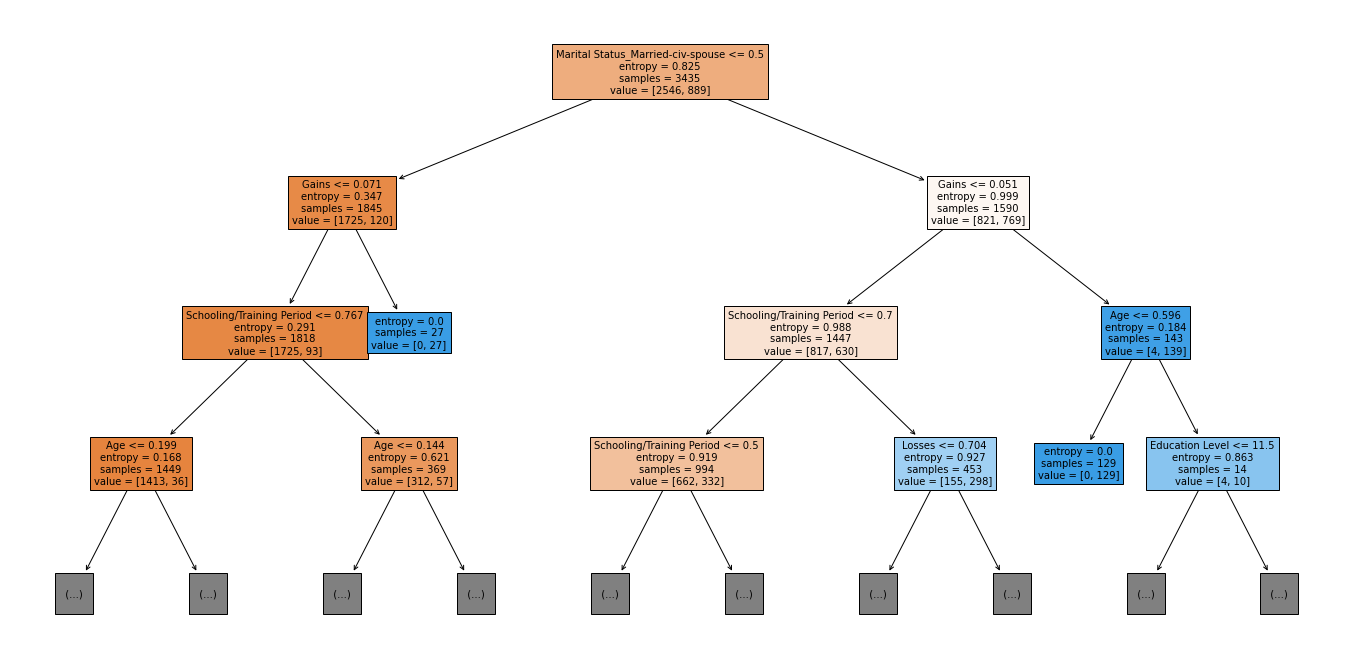

In [190]:
# Visualize Decision Tree
plt.figure(figsize=(24,12))

# Add classnames later again
tree.plot_tree(clf_dt_best, max_depth=3, fontsize=10, feature_names=income_X_train.columns, filled=True)
plt.show()

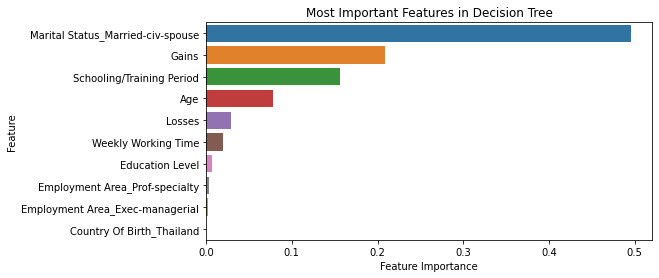

In [180]:
feature_importance_dt = pd.Series(clf_dt_best.feature_importances_,index=income_X_train.columns).sort_values(ascending=False).head(10)

plt.figure(figsize=(8,4))
features_barplot = sns.barplot(x=feature_importance_dt, y=feature_importance_dt.index)
features_barplot.set(xlabel="Feature Importance", ylabel="Feature", title="Most Important Features in Decision Tree")
plt.show()

### Random Forest

In [202]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter Tuning
parameters = {'n_estimators': [200]}
rfc = RandomForestClassifier(random_state=42)
clf_rf = GridSearchCV(rfc, parameters, scoring='roc_auc')
clf_rf.fit(income_X_train, income_y_train)
print(clf_rf)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [200]}, scoring='roc_auc')


In [203]:
clf_rf.best_estimator_

RandomForestClassifier(n_estimators=200, random_state=42)

In [204]:
income_y_pred_rf = clf_dt_best.predict(income_X_test)
accuracy_score(income_y_pred_rf, income_y_test)

0.8471615720524017

### Model Evaluation

In [205]:
# Accuracy
print("Accuracy Linear Classification:", round(accuracy_score(income_y_test, income_y_pred_svm), 4))
print("Accuracy Decision Tree:", round(accuracy_score(income_y_test, income_y_pred_dt), 4))
print("Accuracy Random Forest:", round(accuracy_score(income_y_test, income_y_pred_rf), 4))

Accuracy Linear Classification: 0.8332
Accuracy Decision Tree: 0.8472
Accuracy Random Forest: 0.8472


In [206]:
from sklearn.metrics import classification_report

# Precision, Recall + F-Measure
print("Classification Report (SVM):\n", classification_report(income_y_test, income_y_pred_svm))

print("\nClassification Report (Decision Tree):\n", classification_report(income_y_test, income_y_pred_dt))

print("\nClassification Report (Random Forest):\n", classification_report(income_y_test, income_y_pred_rf))

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       876
           1       0.65      0.64      0.64       269

    accuracy                           0.83      1145
   macro avg       0.77      0.76      0.77      1145
weighted avg       0.83      0.83      0.83      1145


Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       876
           1       0.72      0.57      0.64       269

    accuracy                           0.85      1145
   macro avg       0.80      0.75      0.77      1145
weighted avg       0.84      0.85      0.84      1145


Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       876
           1       0.72      0.57      0.64       269

    accuracy                           0.85      1145
   macro avg    

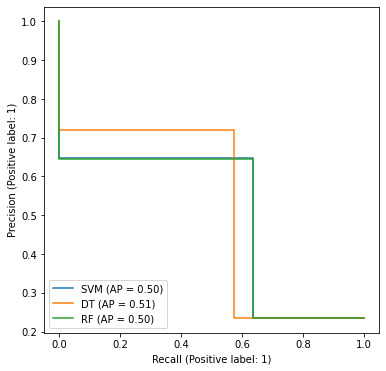

In [183]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
PrecisionRecallDisplay.from_predictions(income_y_test, income_y_pred_svm, name="SVM", ax=ax)
PrecisionRecallDisplay.from_predictions(income_y_test, income_y_pred_dt, name="DT", ax=ax)
PrecisionRecallDisplay.from_predictions(income_y_test, income_y_pred_rf, name="RF", ax=ax)
plt.show()

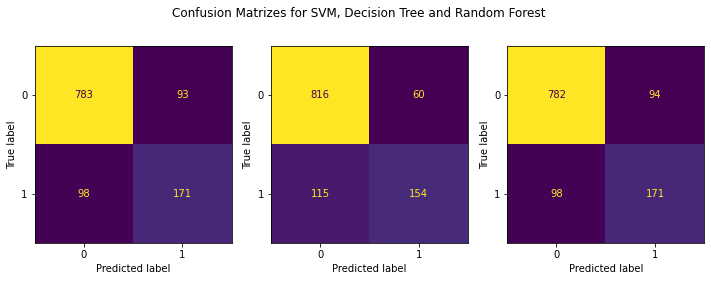

In [184]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
fig.suptitle('Confusion Matrizes for SVM, Decision Tree and Random Forest')
ConfusionMatrixDisplay.from_predictions(income_y_test, income_y_pred_svm, ax=ax1, colorbar=False)
ConfusionMatrixDisplay.from_predictions(income_y_test, income_y_pred_dt, ax=ax2, colorbar=False)
ConfusionMatrixDisplay.from_predictions(income_y_test, income_y_pred_rf, ax=ax3, colorbar=False)
plt.show()

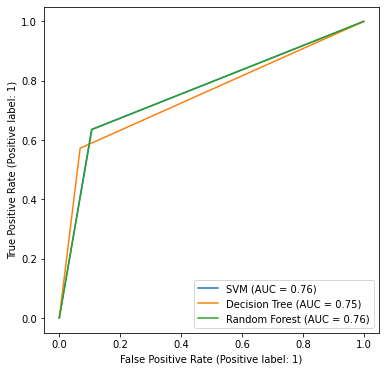

In [185]:
# ROC/AUC
from sklearn.metrics import RocCurveDisplay

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
RocCurveDisplay.from_predictions(income_y_test, income_y_pred_svm, name="SVM", ax=ax)
RocCurveDisplay.from_predictions(income_y_test, income_y_pred_dt, name="Decision Tree", ax=ax)
RocCurveDisplay.from_predictions(income_y_test, income_y_pred_rf, name="Random Forest", ax=ax)
plt.show()

## Conclusion

## Extra

In [142]:
# Apply same transformations applied to income_labeled
income_unlabeled_transformed = income_unlabeled.copy()

income_unlabeled_transformed = income_unlabeled_transformed.drop('Weighting Factor', axis=1)
income_unlabeled_transformed = income_unlabeled_transformed.drop('Income', axis=1)
income_unlabeled_transformed = income_unlabeled_transformed.dropna()
income_unlabeled_transformed['Education Level'] = oe_edu.fit_transform(income_unlabeled_transformed[['Education Level']])
income_unlabeled_transformed = pd.get_dummies(income_unlabeled_transformed, columns=one_hot_columns)

# Apply the same scaler for predicting based on the fit of the train data
col_names = ['Age', 'Schooling/Training Period', 'Weekly Working Time', 'Gains', 'Losses']
features = income_unlabeled_transformed[col_names]
features = scaler.transform(features.values)
income_unlabeled_transformed[col_names] = features

# Filter by columns that were used for training the model
income_unlabeled_X = income_unlabeled_transformed[income_X_train.columns.to_list()]
income_unlabeled_y_pred = clf_svm.predict(income_unlabeled_X)

# Merge together
income_unlabled_predicted = income_unlabeled_X
income_unlabled_predicted['Income'] = income_unlabeled_y_pred.tolist()
income_unlabled_predicted['Income'].replace([0, 1], ['<=50K', '>50K'], inplace=True)

display(income_unlabled_predicted)

,Age,Education Level,Schooling/Training Period,Gains,Losses,Weekly Working Time,Employment Type_Federal-gov,Employment Type_Local-gov,Employment Type_Private,Employment Type_Self-emp-inc,...,Country Of Birth_Puerto-Rico,Country Of Birth_Scotland,Country Of Birth_South,Country Of Birth_Taiwan,Country Of Birth_Thailand,Country Of Birth_Trinadad&Tobago,Country Of Birth_United-States,Country Of Birth_Vietnam,Country Of Birth_Yugoslavia,Income
5000,-0.227247,9.0,-0.004444,2.782856e-06,0.000000,-0.005102,0,0,0,1,...,0,0,0,0,0,0,1,0,0,<=50K
5001,-0.225746,13.0,-0.013333,0.000000e+00,0.000245,-0.006352,0,0,1,0,...,0,0,0,0,0,0,1,0,0,<=50K
5002,-0.231188,8.0,-0.031111,5.013100e-07,0.000000,-0.006143,0,0,1,0,...,0,0,0,0,0,0,1,0,0,<=50K
5003,-0.230813,8.0,-0.031111,0.000000e+00,0.000000,-0.006143,0,0,1,0,...,0,0,0,0,0,0,1,0,0,<=50K
5004,-0.229311,8.0,-0.031111,0.000000e+00,0.000000,-0.006143,0,0,1,0,...,0,0,0,0,0,0,1,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.230437,14.0,-0.008889,0.000000e+00,0.000000,-0.005623,0,0,1,0,...,0,0,0,0,0,0,0,0,0,<=50K
29996,-0.227059,11.0,-0.022222,0.000000e+00,0.000000,-0.004477,0,0,1,0,...,0,0,0,0,0,0,0,0,0,<=50K
29997,-0.224620,12.0,-0.026667,0.000000e+00,0.000000,-0.006664,0,1,0,0,...,0,0,0,0,0,0,1,0,0,<=50K
29998,-0.228373,8.0,-0.031111,0.000000e+00,0.000000,-0.006143,0,0,1,0,...,0,0,0,0,0,0,1,0,0,<=50K


## References

[1] Imbalanced Data by Google Developers: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data